In [421]:
import numpy as np
import pandas as pd

In [422]:
df=pd.read_csv('census-income_final.csv')

In [423]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [424]:
#EDA
df.columns


Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [425]:
df.rename(columns={' ':'income'},inplace=True)

In [426]:
df.rename(columns={' workclass':'workclass'},inplace=True)

In [427]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [428]:
df=df.replace(' ?',np.nan)


In [429]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [430]:
df.isnull().sum()

age                   0
workclass          1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
income                0
dtype: int64

In [431]:
((df.isnull().sum())/len(df))*100

age                0.000000
workclass          5.638647
 fnlwgt            0.000000
 education         0.000000
 education-num     0.000000
 marital-status    0.000000
 occupation        5.660146
 relationship      0.000000
 race              0.000000
 sex               0.000000
 capital-gain      0.000000
 capital-loss      0.000000
 hours-per-week    0.000000
 native-country    1.790486
income             0.000000
dtype: float64

In [432]:
df=df.dropna()

In [433]:
df.isnull().sum()

age                0
workclass          0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
income             0
dtype: int64

In [434]:
nlist = [i for i in df.select_dtypes(['int64'])]

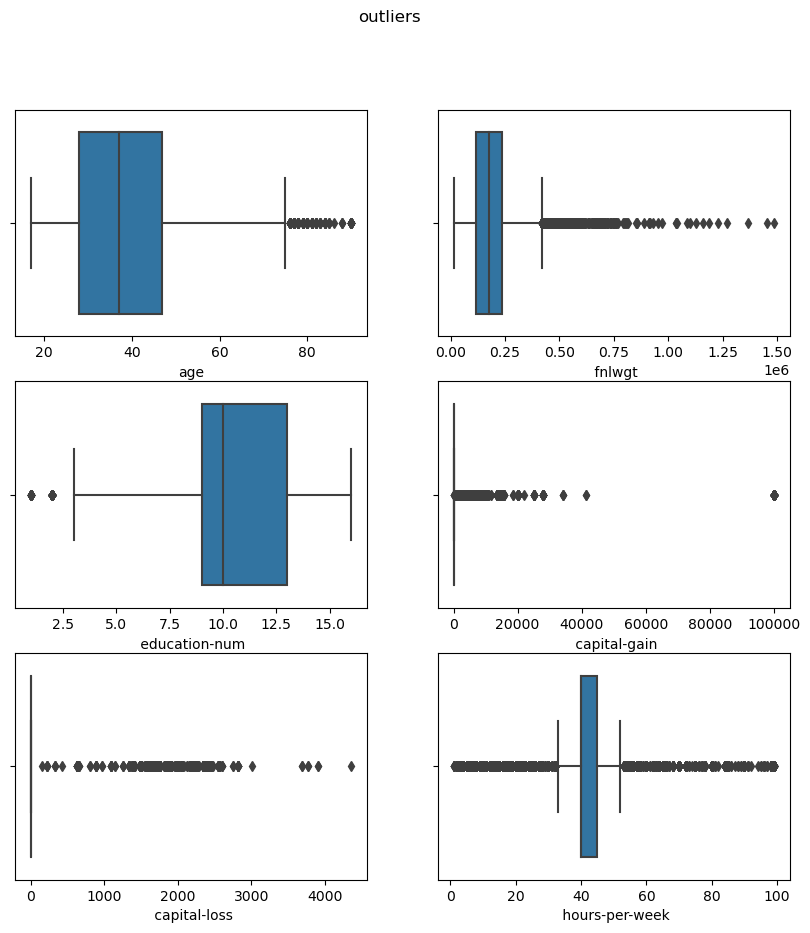

In [435]:
import matplotlib.pyplot as plt
import seaborn as sns
k=1
plt.figure(figsize=(10,10))
plt.suptitle("outliers")
for i in df.loc[:,nlist]:
    plt.subplot(3,2,k)
    sns.boxplot(x=i,data=df.loc[:,nlist])
    k=k+1

In [436]:
df[(df['workclass']==' State-gov')&(df[' sex']=='Male')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [437]:
df[(((df[' education']==' Bachelors') & (df['age']==' 29'))|(df[' native-country']==' United-States'))]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [438]:
df.drop_duplicates(inplace=True)

In [439]:
df.dtypes

age                 int64
workclass          object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
income             object
dtype: object

In [440]:
label_list = [i for i in df.select_dtypes(['object'])]
#label_list.remove('income')

In [441]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in label_list:
    df[i]=la.fit_transform(df[i])
    

In [442]:
from sklearn.preprocessing import StandardScaler
c=StandardScaler()

In [443]:
cols=['age',
 'workclass',
 ' fnlwgt',
 ' education',
 ' education-num',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week',
 ' native-country']


In [444]:
df[cols]=c.fit_transform(df[cols])

In [445]:
x=df.iloc[:,:-1]
y=df['income']

In [446]:
from sklearn.model_selection import train_test_split

In [447]:
y=y.astype(str)

In [448]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45)

In [449]:
from sklearn.linear_model import LogisticRegression

In [450]:
lg=LogisticRegression()

In [451]:
lg.fit(x_train,y_train)

LogisticRegression()

In [452]:
pred=lg.predict(x_test)

In [453]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [454]:
print(accuracy_score(pred,y_test))

0.820725503207255


In [455]:
from sklearn.tree import DecisionTreeClassifier

In [456]:
dt=DecisionTreeClassifier()

In [457]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [458]:
dy_pred=dt.predict(x_test)

In [459]:
accuracy_score(dy_pred,y_test)

0.7970581729705817

In [460]:
df['income'].value_counts()

0    22633
1     7506
Name: income, dtype: int64